## HW 2 ( 30 points)

Submit your homework as a. ipynb file. Use the format 'HW2_LastName_FirstName.ipynb'. If there are no comments/markdown describing what you have done, your work will not be graded. Follow the code of conduct.

#### Problem 1: Classes to model a CSTR (10 points)

Create a class named CSTR that takes in inlet concentration, flow rate and reactor volume and calculates residence time as well outlet concentration. The formula for the outlet concentration of a species in a CSTR (Continuous Stirred Tank Reactor) at steady state is: C_out = C_in / (1 + (k * τ)) where C_out is the outlet concentration, C_in is the inlet concentration, k is the reaction rate constant, and τ is the residence time (V/F, with V being the reactor volume and F the volumetric flow rate). Use a reaction rate constant of 2.5 and make sure your class is printing the outputs (both residence time and outlet concentration)

In [1]:
class CSTR:
    def __init__(self, C_in, F, V):
        # Inlet concentration (C_in), Flow rate (F), and Reactor volume (V)
        self.C_in = C_in
        self.F = F
        self.V = V
        # Reaction rate constant (k)
        self.k = 2.5
        # Calculate residence time (τ)
        self.tau = self.V / self.F
        # Calculate outlet concentration (C_out) at steady state
        self.C_out = self.C_in / (1 + (self.k * self.tau))

    def outputs(self):
        print(f"Residence Time (τ): {self.tau:.2f}")
        print(f"Outlet Concentration (C_out): {self.C_out:.2f}")


# Example usage
# Inlet concentration (C_in), Flow rate (F), and Reactor volume (V)
C_in = 10  # concentration (mol/L)
F = 5      # flow rate (L/time)
V = 50     # reactor volume (L)

# Create an instance of the CSTR class
reactor = CSTR(C_in, F, V)

# Print the results
reactor.outputs()


Residence Time (τ): 10.00
Outlet Concentration (C_out): 0.38


#### Problem 2: Industrial Reactor Performance Analysis and Statistical Investigation (20 points)

You are provided with a dataset. The dataset contains 12,000 hourly measurements from an industrial batch reactor system producing a specialty chemical. The data includes:

*   Reactor temperature (°C)
*   Pressure (bar)
*   Feed flow rate (L/hr)
*   Product concentration (mol/L)
*   Catalyst activity index
*   Impurity levels (ppm)
*   Conversion efficiency (%)
*   Energy consumption (kW)

Missing values are marked as -999. 

A) Handle missing values (if any). You can choose an appropriate method (e.g., imputation, removal) and justify your choice.

B) Create a 2x4 subplot showing the distributions of all 8 variables. Label each histogram with its mean and standard deviation.

C) Create boxplots for each variable to identify potential outliers.

D) Take Conversion Efficiency:
- Take a large number of random samples (e.g., 1000 or more) of a fixed sample size n (experiment with different sample sizes like 5, 10, 30, 50, 100). For each sample, calculate the sample mean.
- Create a histogram of the calculated sample means. Calculate and report the mean and standard deviation of the distribution of sample means.
- Overlay a normal distribution curve (with the mean and standard deviation calculated in Task B) on each histogram of sample means. Discuss your results in the context of the Central limit Theorem.

#### (A) Handle missing values (if any). You can choose an appropriate method (e.g., imputation, removal) and justify your choice.

In [2]:
# Load the packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (assuming the dataset is in a CSV file)
df = pd.read_csv("reactor_data.csv")

# Drop rows where any column has a value of -999 (NA)
df_cleaned = df[~(df == -999).any(axis=1)]

# Check if there is other missing values
missing_values = df_cleaned.isna().sum().sum()
if missing_values > 0:
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

Matplotlib is building the font cache; this may take a moment.


There are no missing values in the dataset.


#### (B) Create a 2x4 subplot showing the distributions of all 8 variables. Label each histogram with its mean and standard deviation

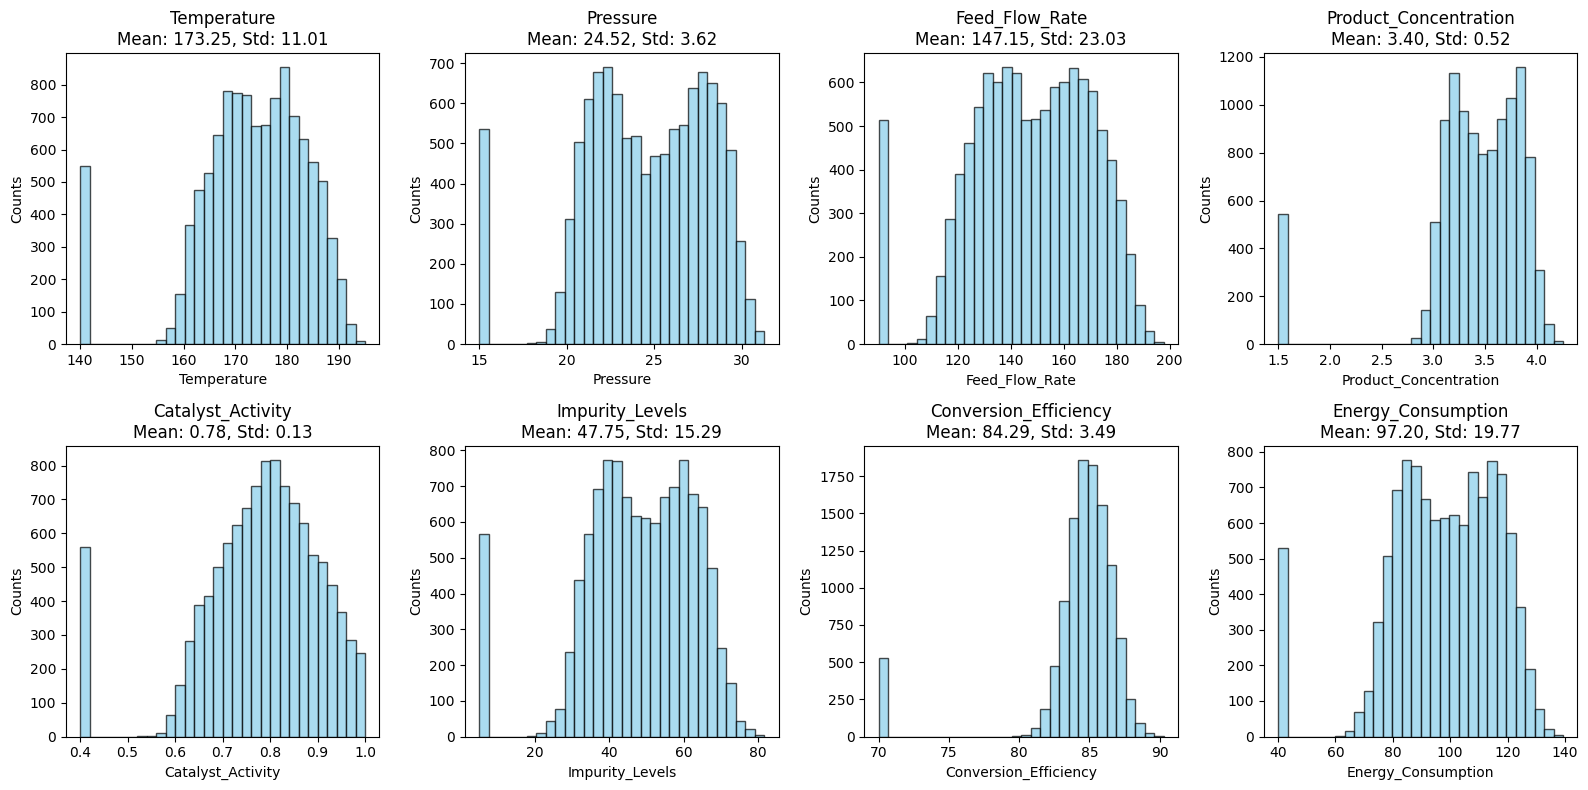

In [3]:
# List of column names (8 variables)
columns = df.columns

# Set up the 2x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Loop through each variable and plot histograms
for i, col in enumerate(columns):
    ax = axes[i // 4, i % 4]  # 2x4 subplot indexing
    data = df_cleaned[col]  # Get data for the current column
    
    # Plot histogram
    ax.hist(data, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    
    # Calculate the mean and standard deviation
    mean = np.mean(data)
    std = np.std(data)
    
    # Set title and labels
    ax.set_title(f'{col}\nMean: {mean:.2f}, Std: {std:.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Counts')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



#### (C) Create boxplots for each variable to identify potential outliers.

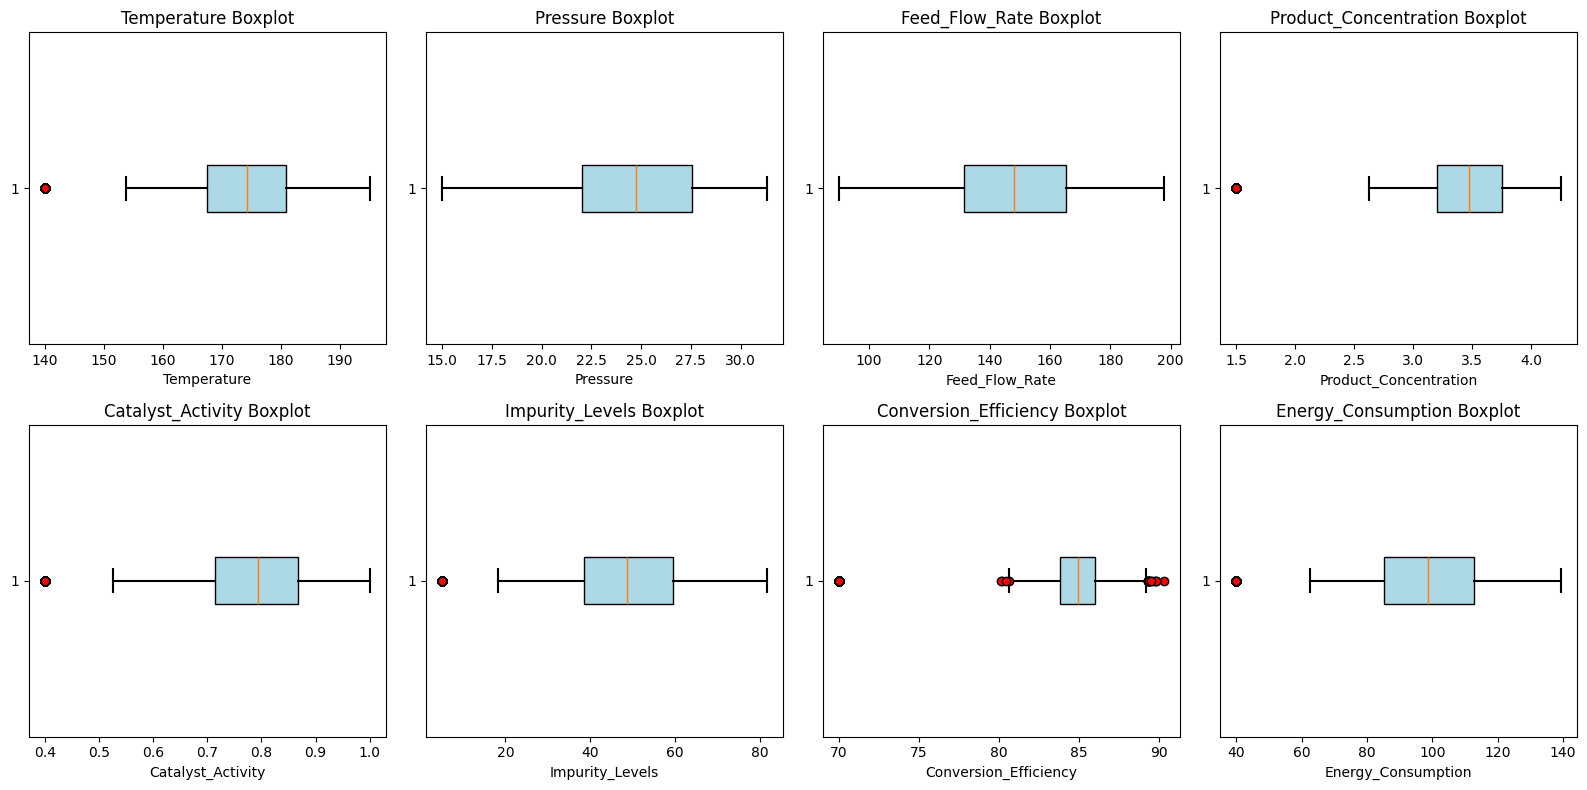

In [4]:
# Set up the 2x4 subplot grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Loop through each variable and plot boxplots
for i, col in enumerate(columns):
    ax = axes[i // 4, i % 4]  # 2x4 subplot indexing
    data = df_cleaned[col]  # Get data for the current column
    
    # Plot boxplot using matplotlib
    ax.boxplot(data, vert=False, patch_artist=True, 
               boxprops=dict(facecolor='lightblue', color='black'),
               whiskerprops=dict(color='black', linewidth=1.5),
               capprops=dict(color='black', linewidth=1.5),
               flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))
    
    # Set title and labels
    ax.set_title(f'{col} Boxplot')
    ax.set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### (D) Take Conversion Efficiency:
- Take a large number of random samples (e.g., 1000 or more) of a fixed sample size n (experiment with different sample sizes like 5, 10, 30, 50, 100). For each sample, calculate the sample mean.
- Create a histogram of the calculated sample means. Calculate and report the mean and standard deviation of the distribution of sample means.
- Overlay a normal distribution curve (with the mean and standard deviation calculated in Task B) on each histogram of sample means. Discuss your results in the context of the Central limit Theorem.

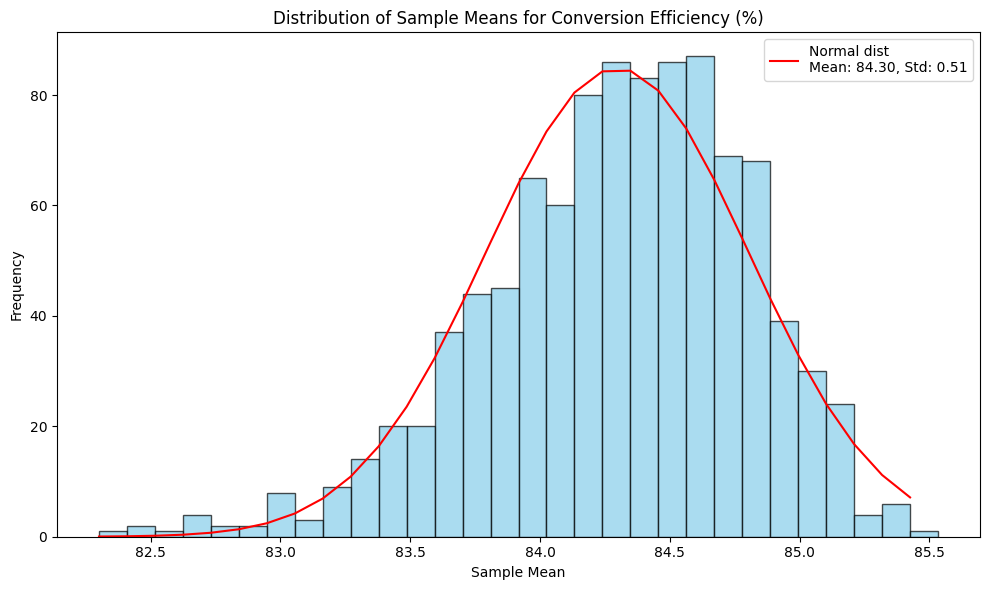

Conversion Efficiency (%) - Mean: 84.30, Std: 0.51


In [5]:
# Define parameters
n_samples = 1000   # Number of samples to draw
sample_size = 50    # Sample size for each sample (experiment with 5, 10, 30, 50, 100)

# The column of interest
column = 'Conversion_Efficiency'

# Extract the data for conversion efficiency and drop missing values
data = df_cleaned[column].dropna()

# List to store the means of each sample
sample_means = []

# Perform random sampling and calculate sample means
for _ in range(n_samples):
    sample = np.random.choice(data, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# Convert the list of sample means to a numpy array for easier handling
sample_means = np.array(sample_means)

# Calculate the mean and standard deviation of the sample means
mean_of_sample_means = np.mean(sample_means)
std_of_sample_means = np.std(sample_means)

# Create the histogram of sample means with raw counts (no density)
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7, color='skyblue')

# To overlay the normal distribution curve, we need to adjust the scale to match the histogram
# Calculate the height of the normal distribution curve to match the histogram's max count
bin_width = bins[1] - bins[0]
normal_curve = (1 / (std_of_sample_means * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((bins[:-1] - mean_of_sample_means) / std_of_sample_means) ** 2)

# Scale the normal distribution to match the histogram's raw counts
normal_curve_scaled = normal_curve * (count.sum() * bin_width)

# Overlay the normal distribution curve
plt.plot(bins[:-1], normal_curve_scaled, 'r-', label=f'Normal dist\nMean: {mean_of_sample_means:.2f}, Std: {std_of_sample_means:.2f}')

# Title and labels
plt.title(f"Distribution of Sample Means for Conversion Efficiency (%)")
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Output the mean and standard deviation of sample means for Conversion Efficiency
print(f"Conversion Efficiency (%) - Mean: {mean_of_sample_means:.2f}, Std: {std_of_sample_means:.2f}")
